In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 1. Read Data

In [22]:
df = pd.read_csv("./datasets/train.csv")
df_test = pd.read_csv("./datasets/test.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Seperate numerical & categorical Features !

In [23]:
numerical_features = ["LotFrontage", "LotArea", "MasVnrArea",
                      "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF",
                      "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
                      "FullBath","HalfBath", "BedroomAbvGr","KitchenAbvGr", "TotRmsAbvGrd",
                      "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF",
                      "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]
df_numerical = df[numerical_features]

In [24]:
date_features = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold" ]

In [25]:
categorical_features = [col for col in df.columns.tolist() if col not in numerical_features and col not in date_features]
categorical_features.remove('Id')
categorical_features.remove('SalePrice')
df_categorical = df[categorical_features]

##### fill nan values for Numerical Features

In [26]:
na_counts = df_numerical.isna().sum().sort_values(ascending=False)
na_counts[na_counts > 0]

LotFrontage    259
MasVnrArea       8
dtype: int64

In [27]:
df_numerical.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [28]:
# Fill NaN values with median (train data)

df_numerical.loc[df_numerical['LotFrontage'].isna(), "LotFrontage"] = df_numerical["LotFrontage"].median()
df_numerical.loc[df_numerical['MasVnrArea'].isna(), "MasVnrArea"] = df_numerical["MasVnrArea"].median()

In [29]:
# Fill NaN values with median (test data)
df_test_numerical = df_test[numerical_features]
na_test_counts = df_test_numerical.isna().sum().sort_values(ascending=False)
nan_cols = na_test_counts[na_test_counts > 0].index
for col in nan_cols :
    df_test_numerical.loc[df_test_numerical[col].isna(), col] = df_test_numerical[col].median()

##### For the categorical features, the NaN values represent the 'none' modality !! so we will not consider them as NaN values. 
Instead, we will simply change the type of the columns to string.

In [30]:
na_counts = df_categorical.isna().sum().sort_values(ascending=False)
na_counts[na_counts > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
Electrical         1
dtype: int64

In [31]:
na_counts = na_counts[na_counts > 0]
for col in na_counts.index.tolist():
    df_categorical.loc[:, col] = df_categorical[col].astype(str)

df_categorical.isna().sum().sum()

0

In [32]:
# test data
df_test_categorical = df_test[categorical_features]
na_counts_test = df_test_categorical.isna().sum().sort_values(ascending=False)
na_counts_test = na_counts_test[na_counts_test > 0]
for col in na_counts_test.index.tolist():
    df_test_categorical.loc[:, col] = df_test_categorical[col].astype(str)

df_test_categorical.isna().sum().sum()

0

##### Encode categorical features

In [33]:
# Encode qualitative variables of type object.
from sklearn.preprocessing import LabelEncoder

df_categorical_enc = df_categorical.copy()
df_test_categorical_enc = df_test_categorical.copy()

for col in df_categorical_enc.columns:
    encoder = LabelEncoder()
    if df_categorical_enc[col].dtypes == "object":
        df_categorical_enc[col] = encoder.fit_transform(df_categorical_enc[col])
        # Create an encoder mapping
        label_mapping = {label: idx for idx, label in enumerate(encoder.classes_)}
        
        # Transform test data
        df_test_categorical_enc[col] = df_test_categorical[col].map(label_mapping)
        
        # Replace the unseen values with a specal label (-1)
        df_test_categorical_enc[col] = df_test_categorical_enc[col].fillna(-1).astype(int)
        

df_categorical_enc.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,3,1,2,3,3,0,4,0,5,...,1,1,4,4,2,3,4,4,8,4
1,20,3,1,2,3,3,0,2,0,24,...,1,1,4,4,2,3,4,4,8,4
2,60,3,1,2,0,3,0,4,0,5,...,1,1,4,4,2,3,4,4,8,4
3,70,3,1,2,0,3,0,0,0,6,...,5,2,4,4,2,3,4,4,8,0
4,60,3,1,2,0,3,0,2,0,15,...,1,1,4,4,2,3,4,4,8,4


#### Perform Feature Engineering on Date Variables

In [34]:
df[date_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,2003,2003,2003.0,2,2008
1,1976,1976,1976.0,5,2007
2,2001,2002,2001.0,9,2008
3,1915,1970,1998.0,2,2006
4,2000,2000,2000.0,12,2008


In [35]:
# Extraction of temporal features (train data)

df['age_at_sale'] = df['YrSold'] - df['YearBuilt']
df['age_garage_at_sale'] = df['YrSold'] - df['GarageYrBlt']
df['time_since_renovation'] = df['YrSold'] - df['YearRemodAdd']
df['month_cos'] = np.cos(2 * np.pi * df['MoSold'] / 12)
df['month_sin'] = np.sin(2 * np.pi * df['MoSold'] / 12)

In [36]:
# Extraction of temporal features (test data)

df_test['age_at_sale'] = df_test['YrSold'] - df_test['YearBuilt']
df_test['age_garage_at_sale'] = df_test['YrSold'] - df_test['GarageYrBlt']
df_test['time_since_renovation'] = df_test['YrSold'] - df_test['YearRemodAdd']
df_test['month_cos'] = np.cos(2 * np.pi * df_test['MoSold'] / 12)
df_test['month_sin'] = np.sin(2 * np.pi * df_test['MoSold'] / 12)

The idea behind the month transform is that using month_sin and month_cos to represent months helps to capture their cyclicity in a continuous and exploitative way, which can improve the performance of the machine learning model by providing a more natural representation of temporal data.

Benefits of this Transformation:

- Capture Cyclical Nature: This transformation enables the model to understand that January is close to December and February.
- Continuous representation: Unlike a simple categorical variable, this continuous representation can often be more useful for machine learning models.

In [37]:
# Drop the original date features
df.drop(date_features, axis=1, inplace=True)
df_test.drop(date_features, axis=1, inplace=True)

In [38]:
new_numerical_features = numerical_features+['age_at_sale','age_garage_at_sale','time_since_renovation','month_cos','month_sin']

df_numerical_new = df[new_numerical_features]
df_test_numerical_new = df_test[new_numerical_features]


##### Prepare data for training

In [119]:
from sklearn.model_selection import train_test_split

df_test_target = pd.read_csv('./datasets/sample_submission.csv')


df_train = pd.concat([df_numerical_new, df_categorical_enc, df[['SalePrice']]], axis=1)
df_test = pd.concat([df_test_numerical_new, df_test_categorical_enc], axis=1)

X_train, y_train = df_train.iloc[:,:-1], df_train[["SalePrice"]]
X_test, y_test = df_test.iloc[:,:], df_test_target[['SalePrice']]

In [110]:
import xgboost as xgb
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor(eval_metric='rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [400, 500, 600, 700],
              "learning_rate": [0.001, 0.01]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 700}


In [111]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

regressor.fit(X_train, y_train)

prediction = regressor.predict(X_test)

In [112]:
# Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error

meanAbErr = metrics.mean_absolute_error(y_test, prediction)
meanSqErr = metrics.mean_squared_error(y_test, prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, prediction))
RMSLE = np.sqrt( mean_squared_log_error(y_test, prediction))

print('Mean Absolute Error: %.5f' % meanAbErr)
print('Mean Square Error: %.5f' % meanSqErr)
print('Root Mean Square Error: %.5f' % rootMeanSqErr)
print("Root Mean Square Log Error: %.5f" % RMSLE )

Mean Absolute Error: 54591.64535
Mean Square Error: 5264523894.34988
Root Mean Square Error: 72557.03890
Root Mean Square Log Error: 0.37448


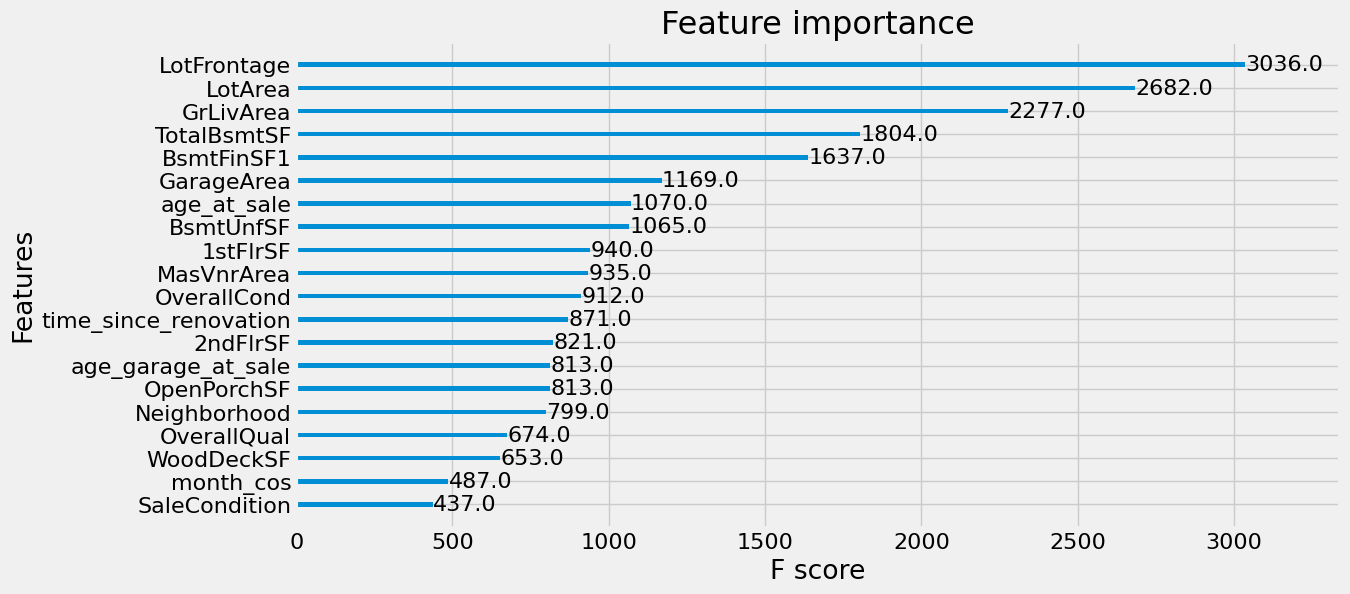

In [113]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(regressor, max_num_features=20, ax=ax)
plt.show();

In [114]:
import pandas as pd
import numpy as np

# Supposons que 'X_train' soit votre DataFrame d'entraînement
feature_importances = regressor.get_booster().get_score(importance_type='weight')
features = list(feature_importances.keys())
importances = list(feature_importances.values())

# Créer un DataFrame des importances de features
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Trier les features par importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les features les plus importantes
print(importance_df.head(12))


                  Feature  Importance
0             LotFrontage      3036.0
1                 LotArea      2682.0
10              GrLivArea      2277.0
6             TotalBsmtSF      1804.0
3              BsmtFinSF1      1637.0
20             GarageArea      1169.0
28            age_at_sale      1070.0
5               BsmtUnfSF      1065.0
7                1stFlrSF       940.0
2              MasVnrArea       935.0
46            OverallCond       912.0
30  time_since_renovation       871.0


##### Select the 8 most important features

In [116]:
top_features = importance_df['Feature'].head(8)

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

new_regressor=xgb.XGBRegressor(eval_metric='rmsle')

from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015, 0.001]}

# try out every combination of the above values
search = GridSearchCV(new_regressor, param_grid, cv=5).fit(X_train_top, y_train)

print("The best hyperparameters are ",search.best_params_)


The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 700}


In [117]:
new_regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

new_regressor.fit(X_train_top, y_train)

prediction = new_regressor.predict(X_test_top)


In [118]:
# Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, prediction)
meanSqErr = metrics.mean_squared_error(y_test, prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, prediction))
RMSLE = np.sqrt( mean_squared_log_error(y_test, prediction))

print('Mean Absolute Error: %.5f' % meanAbErr)
print('Mean Square Error: %.5f' % meanSqErr)
print('Root Mean Square Error: %.5f' % rootMeanSqErr)
print("Root Mean Square Log Error: %.5f" % RMSLE )

Mean Absolute Error: 53033.12823
Mean Square Error: 5062349350.90128
Root Mean Square Error: 71150.18869
Root Mean Square Log Error: 0.35709


##### Predict prices based on the numerical features only

In [134]:
df_test_target = pd.read_csv('./datasets/sample_submission.csv')

df_train = pd.concat([df_numerical_new, df[['SalePrice']]], axis=1)
df_test = df_test_numerical_new

X_train, y_train = df_train.iloc[:,:-1], df_train[["SalePrice"]]
X_test, y_test = df_test, df_test_target[['SalePrice']]

In [135]:
model = xgb.XGBRegressor(eval_metric='rmsle', n_estimators=500, learning_rate=0.002, max_depth=5)
model.fit(X_train, y_train)

# Prédictions
prediction = model.predict(X_test)

In [136]:
# Evaluation on test data

meanAbErr = metrics.mean_absolute_error(y_test, prediction)
meanSqErr = metrics.mean_squared_error(y_test, prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, prediction))
RMSLE = np.sqrt( mean_squared_log_error(y_test, prediction))

print('Mean Absolute Error: %.5f' % meanAbErr)
print('Mean Square Error: %.5f' % meanSqErr)
print('Root Mean Square Error: %.5f' % rootMeanSqErr)
print("Root Mean Square Log Error: %.5f" % RMSLE )

Mean Absolute Error: 31371.03379
Mean Square Error: 1689093658.30807
Root Mean Square Error: 41098.58463
Root Mean Square Log Error: 0.20556


In [137]:
# Evaluation on train data
prediction = model.predict(X_train)
meanAbErr = metrics.mean_absolute_error(y_train, prediction)
meanSqErr = metrics.mean_squared_error(y_train, prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_train, prediction))
RMSLE = np.sqrt( mean_squared_log_error(y_train, prediction))

print('Mean Absolute Error: %.5f' % meanAbErr)
print('Mean Square Error: %.5f' % meanSqErr)
print('Root Mean Square Error: %.5f' % rootMeanSqErr)
print("Root Mean Square Log Error: %.5f" % RMSLE )

Mean Absolute Error: 27527.74841
Mean Square Error: 1579468107.55105
Root Mean Square Error: 39742.52266
Root Mean Square Log Error: 0.21935


==> We conclude that the latest model, which is based only on numerical features for making predictions, achieves the best performance. Additionally, we observe that there is no overfitting because there is no significant difference between the predictions on the training and test data.